# Analysis of Retention Rates at Four-year and Less-than-four-year Institutions

Authors: Janet Choe, Daniel Richards, Connie He, Henry Lam

In [2]:
from IPython.display import Image

## Introduction

What factors affect retention rates at institutions? The retention of students in higher education is a critical factor in ensuring academic success and achieving institutional goals. It is a measure of the proportion of students who continue their studies at the same institution from their initial enrollment to the subsequent academic year. A high retention rate indicates that students are satisfied with their academic experience and the institution's support services, leading to increased student success, reputation, and revenue for the university. In contrast, low retention rates can be detrimental to the institution's academic reputation, financial stability, and the overall student experience.

### Purpose of Analysis

Given the importance of retention rates, there is a growing interest in identifying the factors that influence them. Therefore, our research aims to analyze the factors that affect retention rates at institutions. By examining institutional data, we identify the factors that have the most significant impact on student retention. The findings of this study may provide insight to institutions on how to improve retention rates and enhance the student experience.

### Data

Our team retrieves the data from the [U.S. Department of Education College Scorecard](https://collegescorecard.ed.gov/data/). We utilize the "Most Recent Institution-Level Data" for 1996-97 through 2020-21 containing aggregate data for each institution, which includes information on institutional characteristics, enrollment, student aid, costs, and student outcomes. Since the data was too large to upload to Github, we uploaded the original dataset to [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7857257.svg)](https://doi.org/10.5281/zenodo.7857257)
 while our Github holds our edited version that includes only some variables out of the original dataset.
 
*It is also important to note that most of the variables in the dataset include a high amount of null or "Privacy Suppressed" variables. Due to this aspect, we emphasize to readers that __missing data were excluded from the analysis__, reducing our sample size.*

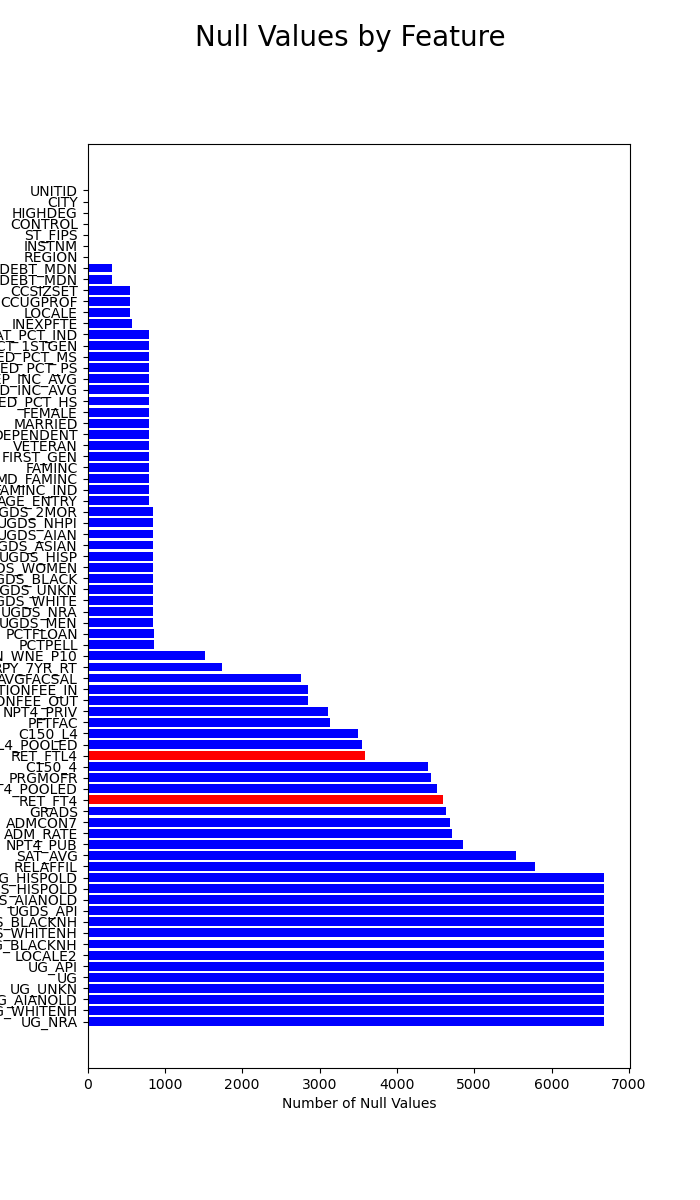

In [4]:
Image("figures/null_values.png", width=600)

## Exploratory Analysis

We first examine the retention rates between four-year institutions and less-than-four-year institutions. We found that retention rates for both 4-year and less than 4-year institutions appear to have a left-skewed distribution. However, less than 4-year institutions has more density contained within the higher retention rates compared to the 4-year institutions.

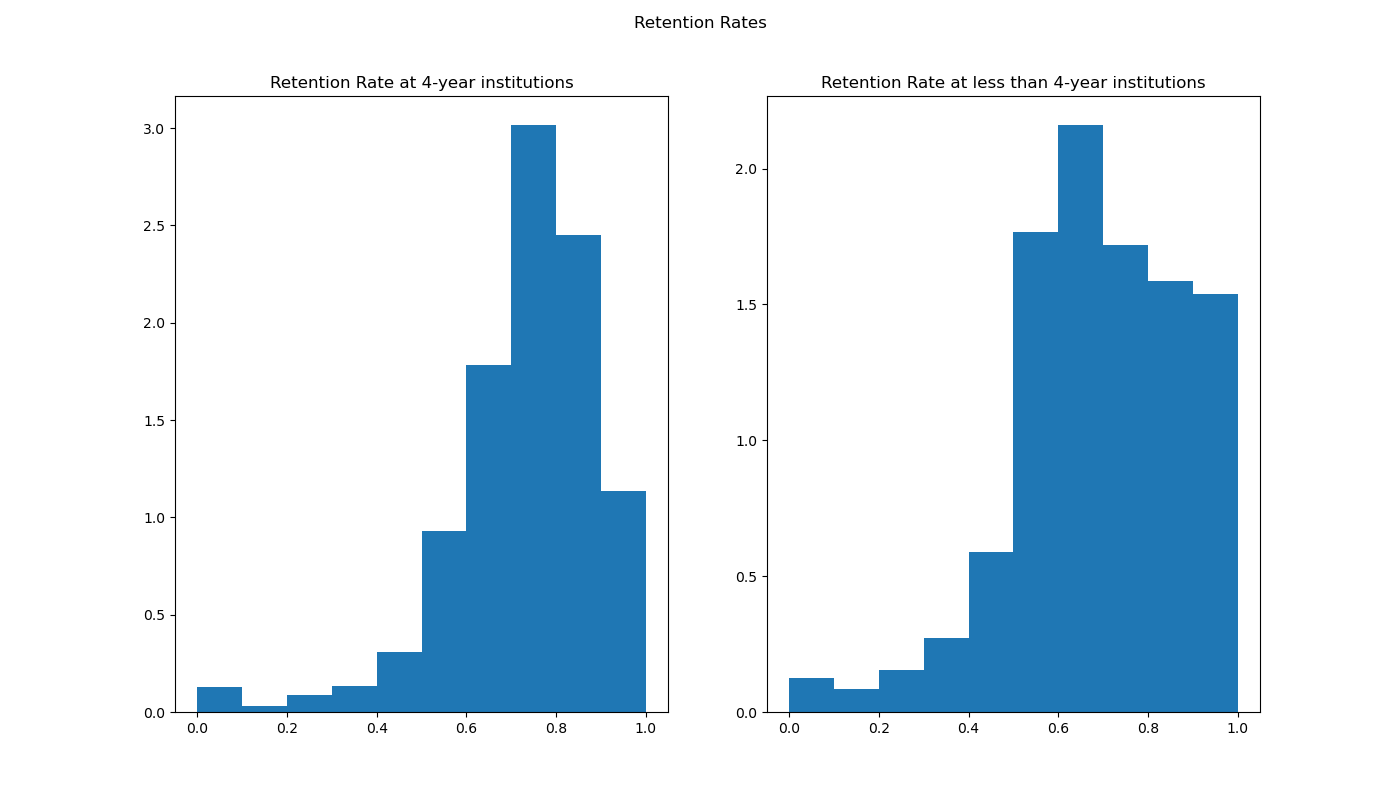

In [9]:
Image("figures/overall_retention_histogram.png")

While the dataset mainly focuses on numerical data, a significant categorical variable that appeared to influence retention rates is the "Control" of the school. 

#### Public School

For public schools, the retention rates severely declines as the left-skewed distribution transforms into a normal distribution. The change is most evident in the retention rates of less than 4-year public institutions.

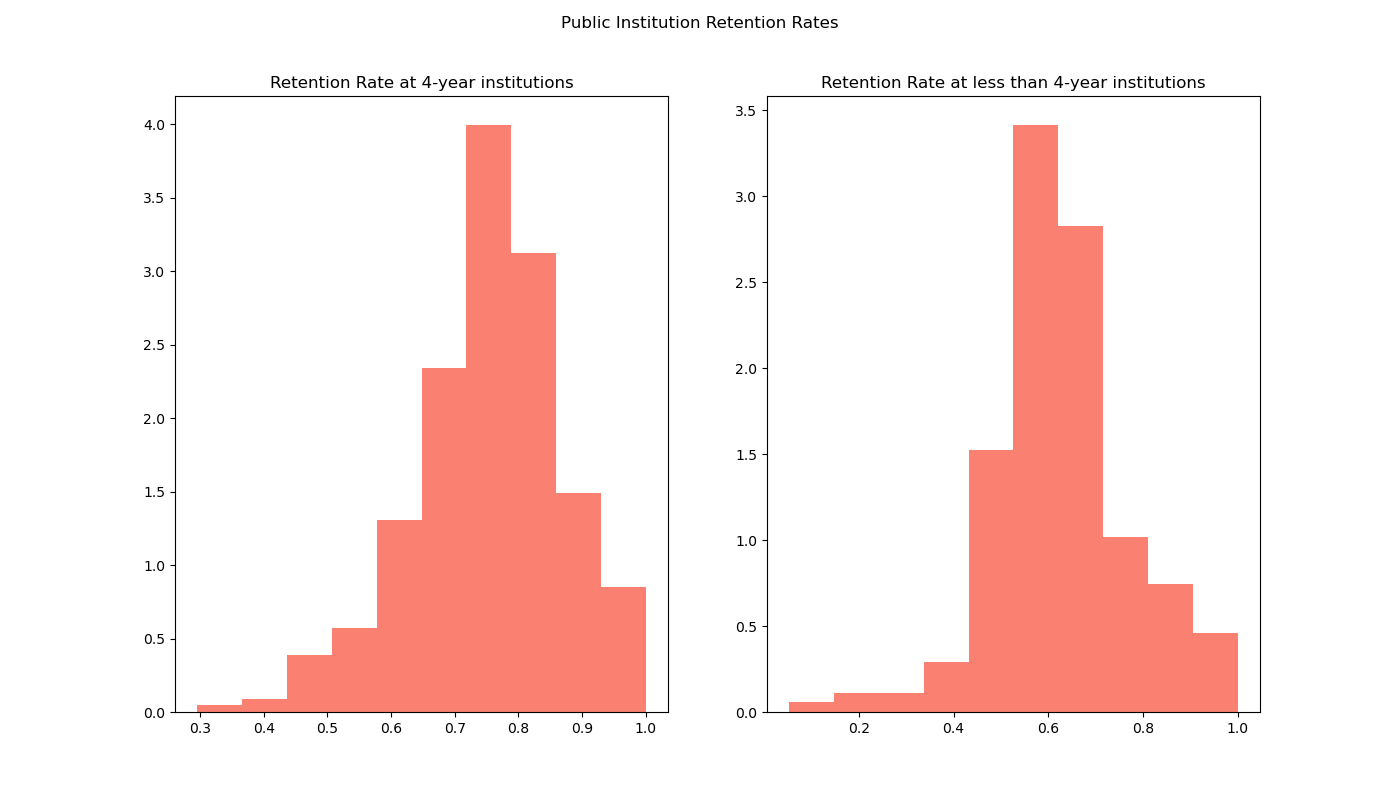

In [10]:
Image('figures/retention_public.png')

#### Non-profit Private Schools

In the case of non-profit private institutions, the retention rates for 4-year institutions appears to remain with the same. However, the retention for less than 4-year institution increases with the density focused in the 100% retention rate.

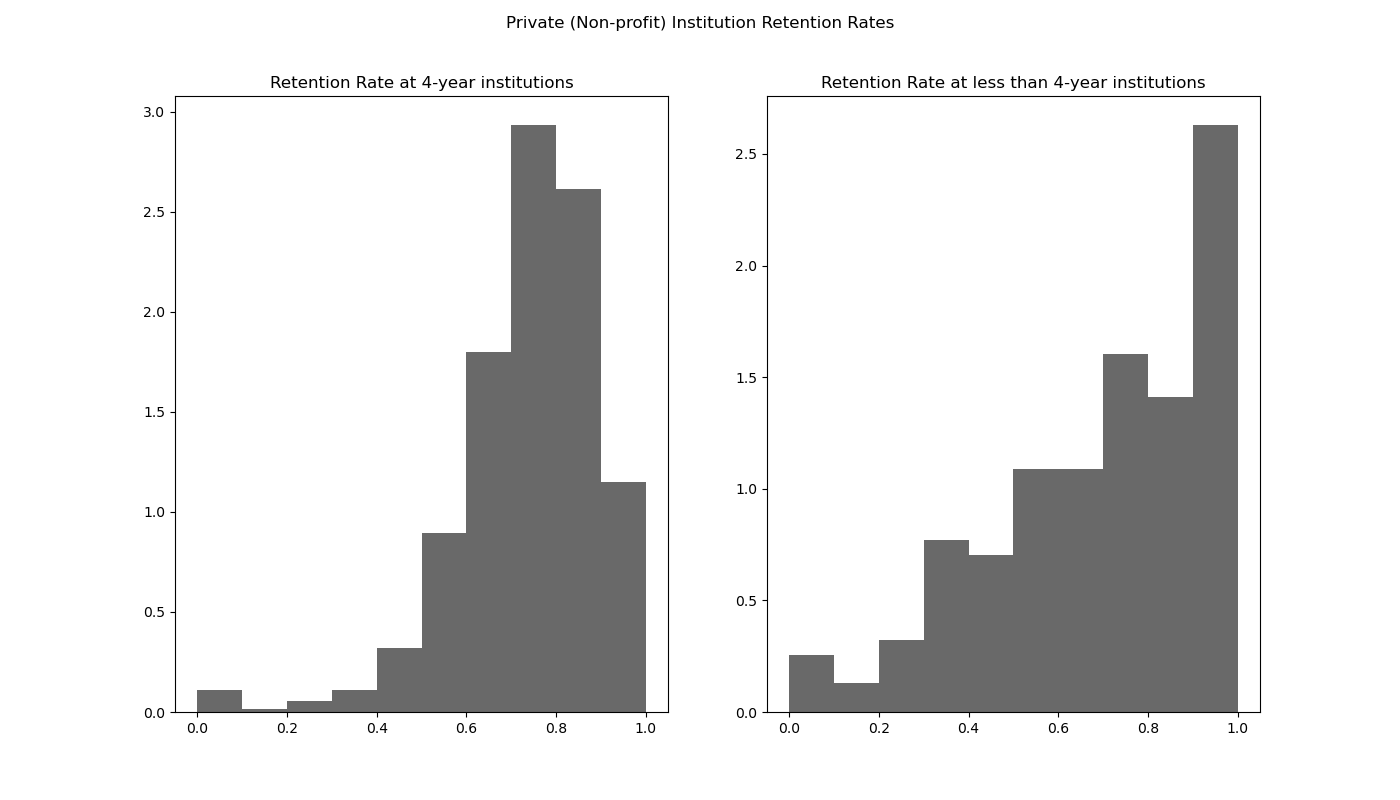

In [11]:
Image('figures/retention_private_non_profit.png')

#### For-profit Private schools

As for-profit private institutions, the retention rate for 4-year institutions maintains a left skewed distribution. However, a spike appears around the the 50% mark which indicates a slightly worse retention than the overall. As for the less than 4-year institution, the retention increases similarly to the non-profit institution as the density is focused on the higher end of the retention rates.

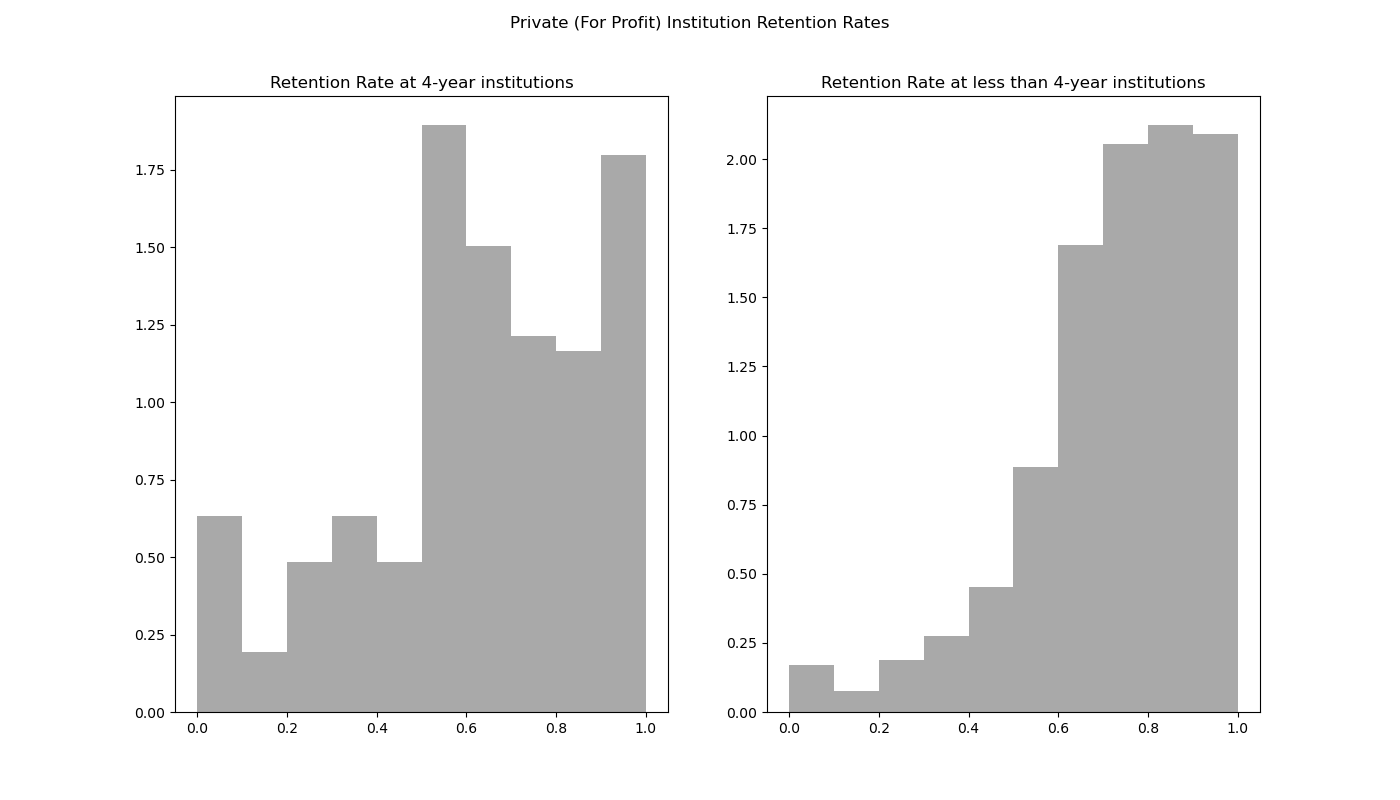

In [12]:
Image('figures/retention_private_profit.png')

Based on the control of the schools, the retention rates for `For-Profit Private Schools` had the most significant change compared to the overall retention rates. The retention between the 4-year and less than 4-year also appears to be the most drastic in this category. Overall, the retention rates at less than 4-year institutions appear to do better despite the different control of the institutions.

#### Feature Importance

As for the majority of the numerical variables, we conduct feature analysis utilizing the ExtraTreesRegressor. However, within the dataset, there are many variables that include "Privacy Suppressed" values. Due to the variability of these values, we have to exclude the these variables from the analysis since our dataset will be very small if we wanted to include them.

Based on feature importance, we found that the following variables have some importance in determining retention rates:

* Four-year retention rates
    - `SAT_AVG` : Average SAT equivalent score of students admitted
    - `AVGFASCAL` : Average faculty salary
    - `PAR_ED_PCT_HS` : Percent of students whose parents' highest educational level is high school
    - `PAR_ED_PCT_PS` : Percent of students whose parents' highest educational level was is some form of postsecondary education

* Less-than-four-year retention rates
    - `Ethnic Diversity (UGDS)` : Total share of enrollment of undergraduate degree-seeking students who are [specific race]

## Predictive Modeling

### *Four-year institutions*

1. SAT_AVG: Average SAT equivalent score of students admitted

2. AVGFACSAL: Average faculty salary

3. PAR_ED_PCT_HS: Percent of students whose parents' highest educational level is high school

4. PAR_ED_PCT_PS: Percent of students whose parents' highest education level was in some form of postsecondary education

### *Less-than-four-year institutions*

1. Ethnic Diversity (UGDS): Total share of enrollment of undergraduate degree-seeking students who are [specific race]